In [1]:
#Load all needed libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import operator
%matplotlib inline
import time

In [2]:
# The following lines you can ignore. It was needed to properly use the current version of Tensorflow on my Macbook 
# due to issues with OpenMP. Leaving here in case it's useful for others.
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#Load the data
dfWhite = pd.read_csv('winequality-white.csv', sep=';', header=0)

In [4]:
#Get all the variable names
var = dfWhite.columns.tolist()
var.pop()
x = dfWhite[var].values
y = dfWhite['quality'].values

ycopy = np.copy(y)
ycopy[ycopy<6] = 0;
ycopy[ycopy==6] = 1;
ycopy[ycopy==7] = 1;
ycopy[ycopy>7] = 2;

Xtr = x[:4000]
Xts = x[4000:]
ytr = ycopy[:4000]
yts = ycopy[4000:]




In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()

In [6]:
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))

model.add(Dense(units=nout, kernel_initializer='uniform', activation='softmax', name='output'))

In [7]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed = time.time()-t

elapsed

Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 88us/sample - loss: 0.8243 - accuracy: 0.6160 - val_loss: 0.6935 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7796 - accuracy: 0.6165 - val_loss: 0.7175 - val_accuracy: 0.6893
Epoch 3/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7720 - accuracy: 0.6180 - val_loss: 0.6702 - val_accuracy: 0.6860
Epoch 4/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7599 - accuracy: 0.6280 - val_loss: 0.6646 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7518 - accuracy: 0.6288 - val_loss: 0.6486 - val_accuracy: 0.6860
Epoch 6/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7432 - accuracy: 0.6338 - val_loss: 0.6429 - val_accuracy: 0.7027
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

2.979999303817749

Text(0.5,1,'Neural Network Performance with Relabeled Output')

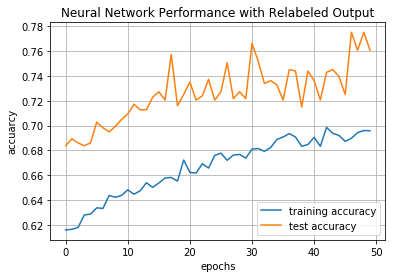

In [9]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])
plt.title('Neural Network Performance with Relabeled Output')

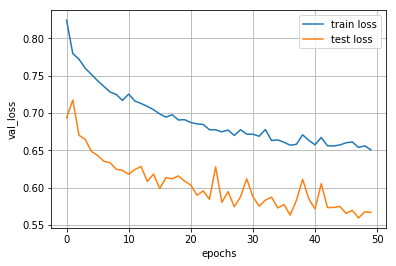

In [10]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

plt.grid()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(['train loss','test loss'])

In [11]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 21us/sample - loss: 0.5667 - accuracy: 0.7606
accuracy = 0.760579


In [12]:
#Data cleaning 


fixed_acidity = dfWhite['fixed acidity'].values
fixed_acidity_max = np.max(fixed_acidity)
fixed_acidity = 2*(fixed_acidity/fixed_acidity_max - 0.5)

volatile_acidity = dfWhite['volatile acidity'].values
volatile_acidity_max = np.max(volatile_acidity)
volatile_acidity = 2*(volatile_acidity/volatile_acidity_max - 0.5)

x = np.stack((fixed_acidity, volatile_acidity), axis=-1)


for i in range(2,len(var)):
    current_column = dfWhite[var[i]].values
    current_column_max = np.max(current_column)
    current_column = 2*(current_column/current_column_max - 0.5)
    x = np.hstack((x, np.atleast_2d(current_column).T)) 

In [13]:
ycopy = np.copy(y)
ycopy[ycopy<6] = 0;
ycopy[ycopy==6] = 1;
ycopy[ycopy==7] = 1;
ycopy[ycopy>7] = 2;

Xtr = x[:4000]
Xts = x[4000:]
ytr = ycopy[:4000]
yts = ycopy[4000:]


In [14]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()

In [15]:
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))

In [16]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
elapsed2

Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 75us/sample - loss: 0.8457 - accuracy: 0.6160 - val_loss: 0.7103 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7948 - accuracy: 0.6160 - val_loss: 0.7067 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7928 - accuracy: 0.6160 - val_loss: 0.7108 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7928 - accuracy: 0.6160 - val_loss: 0.7118 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7899 - accuracy: 0.6160 - val_loss: 0.7072 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7880 - accuracy: 0.6160 - val_loss: 0.7118 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

2.8679990768432617

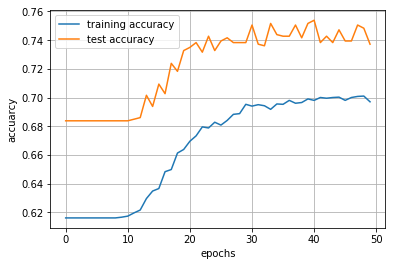

In [18]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [19]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 24us/sample - loss: 0.5836 - accuracy: 0.7372
accuracy = 0.737194


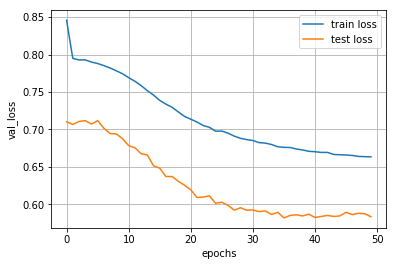

In [20]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

plt.grid()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(['train loss','test loss'])

Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 80us/sample - loss: 0.8448 - accuracy: 0.6030 - val_loss: 0.7168 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7960 - accuracy: 0.6160 - val_loss: 0.7277 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7960 - accuracy: 0.6160 - val_loss: 0.7094 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7963 - accuracy: 0.6160 - val_loss: 0.7122 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7968 - accuracy: 0.6160 - val_loss: 0.7135 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7950 - accuracy: 0.6160 - val_loss: 0.7129 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 15us/sample 

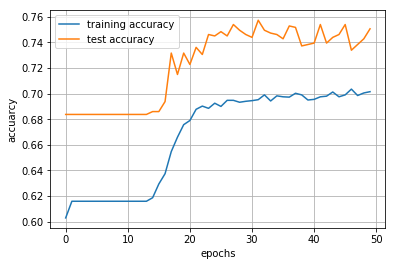

In [21]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden2'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])


In [22]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 19us/sample - loss: 0.5985 - accuracy: 0.7506
accuracy = 0.750557


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 118us/sample - loss: 0.8616 - accuracy: 0.6010 - val_loss: 0.7134 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7959 - accuracy: 0.6160 - val_loss: 0.7144 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 18us/sample - loss: 0.7956 - accuracy: 0.6160 - val_loss: 0.7161 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 18us/sample - loss: 0.7974 - accuracy: 0.6160 - val_loss: 0.7079 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 17us/sample - loss: 0.8018 - accuracy: 0.6160 - val_loss: 0.7140 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 18us/sample - loss: 0.8002 - accuracy: 0.6160 - val_loss: 0.7344 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 18us/sample

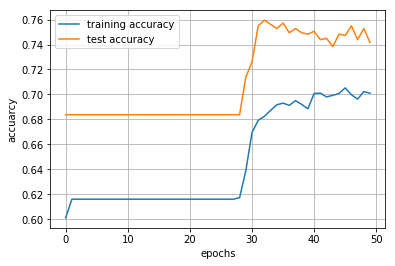

In [23]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nh,kernel_initializer='uniform', activation='sigmoid', name='hidden2'))
model.add(Dense(units=nh,kernel_initializer='uniform', activation='sigmoid', name='hidden3'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [24]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 21us/sample - loss: 0.5853 - accuracy: 0.7416
accuracy = 0.741648


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 94us/sample - loss: 0.9115 - accuracy: 0.5530 - val_loss: 0.7293 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7959 - accuracy: 0.6160 - val_loss: 0.7102 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 17us/sample - loss: 0.7956 - accuracy: 0.6160 - val_loss: 0.7090 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7957 - accuracy: 0.6160 - val_loss: 0.7139 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 18us/sample - loss: 0.7956 - accuracy: 0.6160 - val_loss: 0.7140 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7953 - accuracy: 0.6160 - val_loss: 0.7125 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 16us/sample 

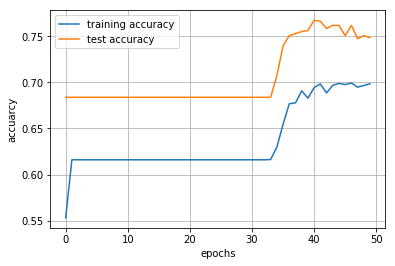

In [25]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=100,kernel_initializer='uniform', activation='sigmoid', name='hidden2'))
model.add(Dense(units=50,kernel_initializer='uniform', activation='sigmoid', name='hidden3'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [26]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 23us/sample - loss: 0.5751 - accuracy: 0.7483
accuracy = 0.748330


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 88us/sample - loss: 0.9276 - accuracy: 0.6160 - val_loss: 0.7661 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.8061 - accuracy: 0.6160 - val_loss: 0.7232 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7957 - accuracy: 0.6160 - val_loss: 0.7165 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7953 - accuracy: 0.6160 - val_loss: 0.7114 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 17us/sample - loss: 0.7950 - accuracy: 0.6160 - val_loss: 0.7191 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7954 - accuracy: 0.6160 - val_loss: 0.7149 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 14us/sample 

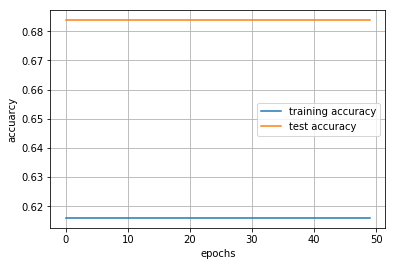

In [27]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=50,kernel_initializer='uniform', activation='sigmoid', name='hidden2'))
model.add(Dense(units=25,kernel_initializer='uniform', activation='sigmoid', name='hidden3'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [28]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 21us/sample - loss: 0.7152 - accuracy: 0.6837
accuracy = 0.683742


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 92us/sample - loss: 1.0749 - accuracy: 0.6160 - val_loss: 1.0460 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 13us/sample - loss: 1.0324 - accuracy: 0.6160 - val_loss: 0.9992 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.9949 - accuracy: 0.6160 - val_loss: 0.9571 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.9615 - accuracy: 0.6160 - val_loss: 0.9196 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.9320 - accuracy: 0.6160 - val_loss: 0.8863 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.9067 - accuracy: 0.6160 - val_loss: 0.8579 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 13us/sample 

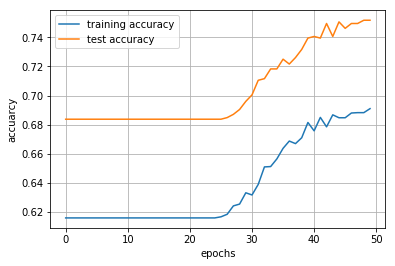

In [29]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='softmax', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [30]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 22us/sample - loss: 0.5964 - accuracy: 0.7517
accuracy = 0.751670


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 113us/sample - loss: 0.9669 - accuracy: 0.6045 - val_loss: 0.7563 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7987 - accuracy: 0.6160 - val_loss: 0.6960 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7889 - accuracy: 0.6160 - val_loss: 0.6907 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7817 - accuracy: 0.6160 - val_loss: 0.6819 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7710 - accuracy: 0.6168 - val_loss: 0.6695 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7596 - accuracy: 0.6215 - val_loss: 0.6632 - val_accuracy: 0.6949
Epoch 7/50
4000/4000 [==============================] - 0s 11us/sample

Text(0.5,1,'Neural Network Performance Relu Activation')

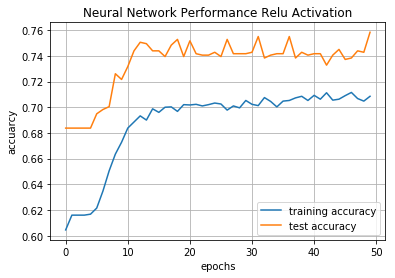

In [31]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='relu', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])
plt.title('Neural Network Performance Relu Activation')

In [32]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 21us/sample - loss: 0.5929 - accuracy: 0.7584
accuracy = 0.758352


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 78us/sample - loss: 0.9194 - accuracy: 0.6045 - val_loss: 0.7097 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7922 - accuracy: 0.6160 - val_loss: 0.7007 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7855 - accuracy: 0.6160 - val_loss: 0.6914 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7768 - accuracy: 0.6160 - val_loss: 0.6775 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7634 - accuracy: 0.6217 - val_loss: 0.6601 - val_accuracy: 0.6860
Epoch 6/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7463 - accuracy: 0.6348 - val_loss: 0.6428 - val_accuracy: 0.6915
Epoch 7/50
4000/4000 [==============================] - 0s 13us/sample 

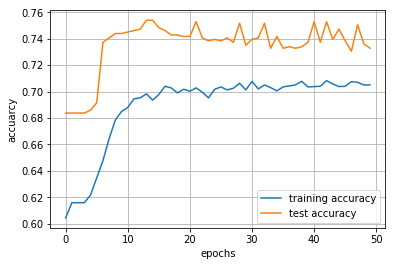

In [33]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='tanh', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [34]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 20us/sample - loss: 0.5905 - accuracy: 0.7327
accuracy = 0.732739


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 71us/sample - loss: 0.9037 - accuracy: 0.6137 - val_loss: 0.7047 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7884 - accuracy: 0.6160 - val_loss: 0.6915 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7785 - accuracy: 0.6165 - val_loss: 0.6821 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 16us/sample - loss: 0.7631 - accuracy: 0.6210 - val_loss: 0.6560 - val_accuracy: 0.6871
Epoch 5/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7432 - accuracy: 0.6365 - val_loss: 0.6406 - val_accuracy: 0.7183
Epoch 6/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7234 - accuracy: 0.6612 - val_loss: 0.6210 - val_accuracy: 0.7361
Epoch 7/50
4000/4000 [==============================] - 0s 14us/sample 

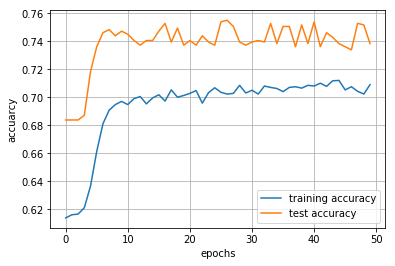

In [35]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='selu', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [36]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 22us/sample - loss: 0.5897 - accuracy: 0.7383
accuracy = 0.738307


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 72us/sample - loss: 0.8597 - accuracy: 0.5738 - val_loss: 0.6989 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7910 - accuracy: 0.6160 - val_loss: 0.7007 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7856 - accuracy: 0.6160 - val_loss: 0.6956 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7785 - accuracy: 0.6160 - val_loss: 0.6865 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7712 - accuracy: 0.6183 - val_loss: 0.6754 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7613 - accuracy: 0.6202 - val_loss: 0.6647 - val_accuracy: 0.6871
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

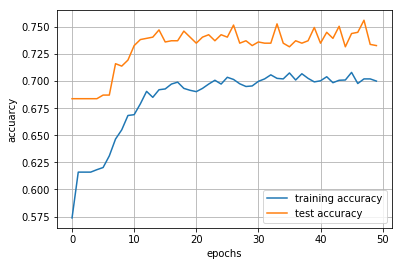

In [37]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='exponential', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [38]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 22us/sample - loss: 0.5964 - accuracy: 0.7327
accuracy = 0.732739


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 107us/sample - loss: 0.8590 - accuracy: 0.6040 - val_loss: 0.7157 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7949 - accuracy: 0.6160 - val_loss: 0.7057 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7935 - accuracy: 0.6160 - val_loss: 0.7051 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7931 - accuracy: 0.6160 - val_loss: 0.7124 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7908 - accuracy: 0.6160 - val_loss: 0.7111 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7883 - accuracy: 0.6160 - val_loss: 0.7108 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample

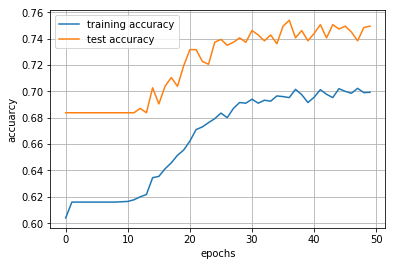

In [39]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data

nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer='uniform', input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer='uniform', activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [40]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 20us/sample - loss: 0.5860 - accuracy: 0.7494
accuracy = 0.749443


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 71us/sample - loss: 8.9822 - accuracy: 0.2122 - val_loss: 7.0960 - val_accuracy: 0.1849
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 4.2138 - accuracy: 0.2510 - val_loss: 1.9739 - val_accuracy: 0.2194
Epoch 3/50
4000/4000 [==============================] - 0s 13us/sample - loss: 1.2166 - accuracy: 0.4593 - val_loss: 0.9666 - val_accuracy: 0.5746
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.9998 - accuracy: 0.5253 - val_loss: 0.9158 - val_accuracy: 0.5924
Epoch 5/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.9519 - accuracy: 0.5400 - val_loss: 0.8765 - val_accuracy: 0.5991
Epoch 6/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.9112 - accuracy: 0.5493 - val_loss: 0.8438 - val_accuracy: 0.6080
Epoch 7/50
4000/4000 [==============================] - 0s 11us/sample 

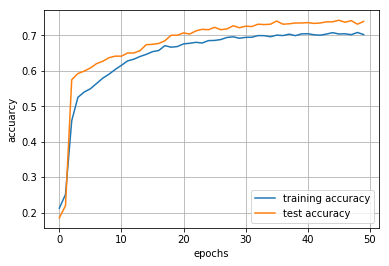

In [41]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [42]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 20us/sample - loss: 0.6103 - accuracy: 0.7394
accuracy = 0.739421


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 71us/sample - loss: 0.8568 - accuracy: 0.5805 - val_loss: 0.7351 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7999 - accuracy: 0.6162 - val_loss: 0.7156 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7850 - accuracy: 0.6168 - val_loss: 0.6953 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7729 - accuracy: 0.6185 - val_loss: 0.6873 - val_accuracy: 0.6849
Epoch 5/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7635 - accuracy: 0.6233 - val_loss: 0.6746 - val_accuracy: 0.6871
Epoch 6/50
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7543 - accuracy: 0.6277 - val_loss: 0.6664 - val_accuracy: 0.6904
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

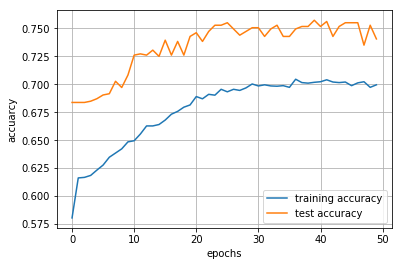

In [43]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [44]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 24us/sample - loss: 0.5949 - accuracy: 0.7405
accuracy = 0.740535


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 72us/sample - loss: 2.4189 - accuracy: 0.2473 - val_loss: 0.8964 - val_accuracy: 0.5947
Epoch 2/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.8502 - accuracy: 0.5930 - val_loss: 0.7491 - val_accuracy: 0.6548
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.8119 - accuracy: 0.6043 - val_loss: 0.7313 - val_accuracy: 0.6704
Epoch 4/50
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7977 - accuracy: 0.6143 - val_loss: 0.7108 - val_accuracy: 0.6782
Epoch 5/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7842 - accuracy: 0.6192 - val_loss: 0.7027 - val_accuracy: 0.6893
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7725 - accuracy: 0.6283 - val_loss: 0.6878 - val_accuracy: 0.6927
Epoch 7/50
4000/4000 [==============================] - 0s 11us/sample 

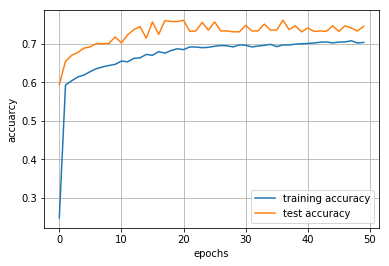

In [45]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [46]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 20us/sample - loss: 0.5896 - accuracy: 0.7461
accuracy = 0.746102


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 75us/sample - loss: 0.8001 - accuracy: 0.6160 - val_loss: 0.7041 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7839 - accuracy: 0.6160 - val_loss: 0.6902 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7794 - accuracy: 0.6162 - val_loss: 0.6917 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7705 - accuracy: 0.6162 - val_loss: 0.6856 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7651 - accuracy: 0.6177 - val_loss: 0.6742 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7602 - accuracy: 0.6208 - val_loss: 0.6668 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 11us/sample 

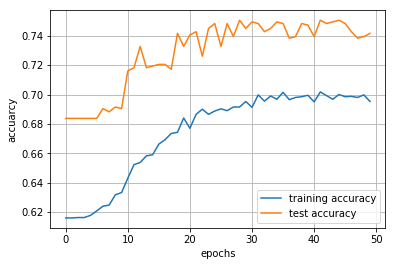

In [47]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.GlorotNormal()
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [48]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 22us/sample - loss: 0.6022 - accuracy: 0.7416
accuracy = 0.741648


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 76us/sample - loss: 1.3441 - accuracy: 0.3173 - val_loss: 0.7739 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.8071 - accuracy: 0.6160 - val_loss: 0.7135 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7920 - accuracy: 0.6160 - val_loss: 0.7062 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7880 - accuracy: 0.6160 - val_loss: 0.6981 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7832 - accuracy: 0.6160 - val_loss: 0.7060 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7797 - accuracy: 0.6160 - val_loss: 0.6929 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 13us/sample 

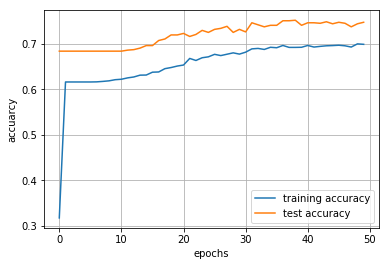

In [49]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.GlorotUniform()
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [50]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 19us/sample - loss: 0.5885 - accuracy: 0.7472
accuracy = 0.747216


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 73us/sample - loss: 0.8611 - accuracy: 0.6033 - val_loss: 0.7206 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7994 - accuracy: 0.6160 - val_loss: 0.7196 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7978 - accuracy: 0.6160 - val_loss: 0.7091 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7957 - accuracy: 0.6160 - val_loss: 0.7108 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 10us/sample - loss: 0.7948 - accuracy: 0.6160 - val_loss: 0.7147 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7938 - accuracy: 0.6160 - val_loss: 0.7060 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 11us/sample 

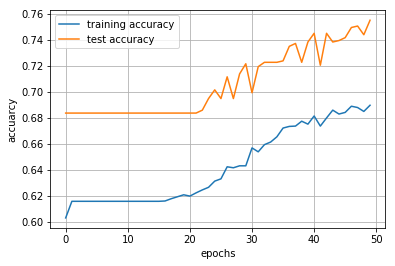

In [51]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.Identity()
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [52]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 21us/sample - loss: 0.6059 - accuracy: 0.7550
accuracy = 0.755011


Train on 4000 samples, validate on 898 samples
Epoch 1/50
4000/4000 [==============================] - 0s 98us/sample - loss: 0.8476 - accuracy: 0.6040 - val_loss: 0.7124 - val_accuracy: 0.6837
Epoch 2/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7938 - accuracy: 0.6160 - val_loss: 0.7256 - val_accuracy: 0.6837
Epoch 3/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7935 - accuracy: 0.6160 - val_loss: 0.7142 - val_accuracy: 0.6837
Epoch 4/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7904 - accuracy: 0.6160 - val_loss: 0.7026 - val_accuracy: 0.6837
Epoch 5/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7886 - accuracy: 0.6160 - val_loss: 0.7084 - val_accuracy: 0.6837
Epoch 6/50
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7868 - accuracy: 0.6160 - val_loss: 0.7001 - val_accuracy: 0.6837
Epoch 7/50
4000/4000 [==============================] - 0s 12us/sample 

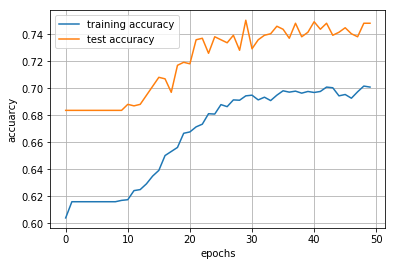

In [53]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
nin = Xtr.shape[1]  # dimension of input data
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh,kernel_initializer=initializer, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout,kernel_initializer=initializer, activation='softmax', name='output'))
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t = time.time()
hist = model.fit(Xtr, ytr, epochs=50, batch_size=100, validation_data=(Xts,yts))
elapsed2 = time.time()-t
print(elapsed2)
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'test accuracy'])

In [54]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

898/898 [==============================] - 0s 20us/sample - loss: 0.5875 - accuracy: 0.7483
accuracy = 0.748330
